# Load libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA
from scipy.ndimage.filters import gaussian_filter
import csv

/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_9207/2189612191.py:7: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


# Define Color maps

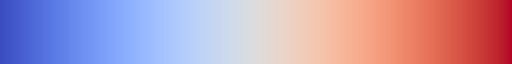

In [2]:
scw = []

with open('../../data/processed_data/common/smooth-cool-warm-table-float-1024.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for i, rows in enumerate(reader):
        if i > 0:
            r = [float(i) for i in rows]
            scw.append(tuple(r[1:]))
            scw.append(r[0])
            
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = list(seq) + [(None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return colors.LinearSegmentedColormap('CustomMap', cdict)

c = colors.ColorConverter().to_rgb
rvb = make_colormap(scw)
rvb

# Color palette

In [3]:
blue = [0.229999504, 0.298998934, 0.754000139]
red = [0.706000136, 0.015991824, 0.150000072]
purple = [0.4588, 0.4392, 0.7020]
mint = [0.1059, 0.6196, 0.4667]

# Extended Figure 3a-c

In [4]:
import numpy as np
edf3ac = np.load(
    "../../data/processed_data/extended_data_figure_3/panels_a-c.npz"
)
rates = edf3ac['rates']
spikes = edf3ac['spikes']
lengths = edf3ac['lengths']
clicks = edf3ac['clicks']
dletaclicks = edf3ac['deltaclicks']
r2_findr_prior=edf3ac['r2_findr_prior']
right_findr_psth_prior=edf3ac['right_findr_psth_prior']
left_findr_psth_prior=edf3ac['left_findr_psth_prior']
right_psth_ci_low=edf3ac['right_psth_ci_low']
right_psth_ci_high=edf3ac['right_psth_ci_high']
left_psth_ci_low=edf3ac['left_psth_ci_low']
left_psth_ci_high=edf3ac['left_psth_ci_high']

In [5]:
from sklearn.metrics import r2_score
r2s = []
for i in range(spikes.shape[0]):
    r2s.append(r2_score(
        np.reshape(np.sum(spikes[i,:lengths[i],:], axis=0), -1), 
        np.reshape(np.sum(rates[i,:lengths[i],:], axis=0), -1)
    ))

r2s2 = []
for i in range(spikes.shape[-1]):
    r2s2.append(r2_score(
        np.array([np.sum(spikes[j,:lengths[j],i]) for j in range(spikes.shape[0])]), 
        np.array([np.sum(rates[j,:lengths[j],i]) for j in range(spikes.shape[0])])
    ))

/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_9207/3938949436.py:276: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


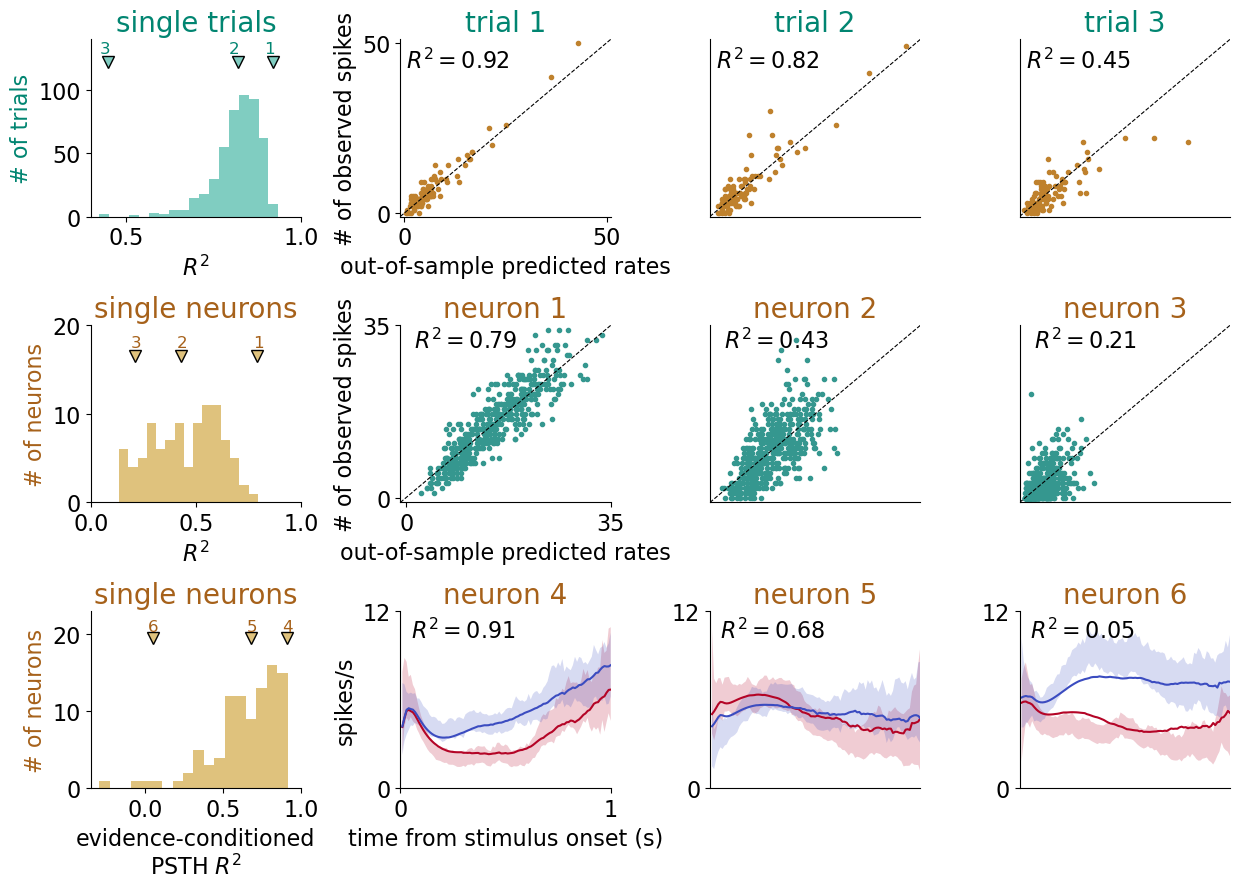

In [6]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
fig, ax = plt.subplots(3, 4, figsize=(12.5, 9), constrained_layout=True)

ax[0, 0].set_title("single trials", color='#018571', fontsize=20)
ax[0, 0].hist(r2s, bins=18, color='#80cdc1', ec="black")

offset = 0.025
ax[0, 0].text(0.45-offset, 129, "3", color="#018571", fontsize=12)
ax[0, 0].text(0.82-offset, 129, "2", color="#018571", fontsize=12)
ax[0, 0].text(0.92-offset, 129, "1", color="#018571", fontsize=12)
ax[0, 0].plot([0.45], [122], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#80cdc1')
ax[0, 0].plot([0.82], [122], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#80cdc1')
ax[0, 0].plot([0.92], [122], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#80cdc1')
ax[0, 0].spines[['right', 'top']].set_visible(False)
ax[0, 0].set_xticks([0, 0.5, 1])
ax[0, 0].set_ylim([0, 140])
ax[0, 0].set_xlim([0.4, 1])
ax[0, 0].set_ylabel("# of trials", color='#018571', fontsize=16)
ax[0, 0].set_xlabel("$R^2$", fontsize=16)
ax[0, 0].tick_params(axis='both', which='major', labelsize=16)

trial = 310
ax[0, 1].set_title("trial 1", color='#018571', fontsize=20)
ax[0, 1].plot(
    np.reshape(np.sum(rates[trial,:lengths[trial],:], axis=0), -1), 
    np.reshape(np.sum(spikes[trial,:lengths[trial],:], axis=0), -1), '.', color='#bf812d')
ax[0, 1].plot(
    [-1, 51],
    [-1, 51], '--',
    color='black', 
    lw=0.8
)
ax[0, 1].text(0.5, 50*0.85, r'$R^2=0.92$', color = 'black', fontsize=16)
ax[0, 1].spines[['right', 'top']].set_visible(False)
ax[0, 1].set_xlim([-1, 51])
ax[0, 1].set_ylim([-1, 51])
ax[0, 1].set_xticks([0, 50])
ax[0, 1].set_yticks([0, 50])
ax[0, 1].set_ylabel("# of observed spikes", fontsize=16)
ax[0, 1].set_xlabel("out-of-sample predicted rates", fontsize=16)
ax[0, 1].tick_params(axis='both', which='major', labelsize=16)

trial = 118
ax[0, 2].set_title("trial 2", color='#018571', fontsize=20)
ax[0, 2].plot(
    np.reshape(np.sum(rates[trial,:lengths[trial],:], axis=0), -1), 
    np.reshape(np.sum(spikes[trial,:lengths[trial],:], axis=0), -1), '.', color='#bf812d')
ax[0, 2].plot(
    [-1, 51],
    [-1, 51], '--',
    color='black',
    lw=0.8
)
ax[0, 2].text(0.5, 50*0.85, r'$R^2=0.82$', color = 'black', fontsize=16)
ax[0, 2].spines[['right', 'top']].set_visible(False)
ax[0, 2].set_xlim([-1, 51])
ax[0, 2].set_ylim([-1, 51])
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[0, 2].tick_params(axis='both', which='major', labelsize=16)

trial = 451
ax[0, 3].set_title("trial 3", color='#018571', fontsize=20)
ax[0, 3].plot(
    np.reshape(np.sum(rates[trial,:lengths[trial],:], axis=0), -1), 
    np.reshape(np.sum(spikes[trial,:lengths[trial],:], axis=0), -1), '.', color='#bf812d')
ax[0, 3].plot(
    [-1, 51],
    [-1, 51], '--',
    color='black',
    lw=0.8
)
ax[0, 3].text(0.5, 50*0.85, r'$R^2=0.45$', color='black', fontsize=16)
ax[0, 3].spines[['right', 'top']].set_visible(False)
ax[0, 3].set_xlim([-1, 51])
ax[0, 3].set_ylim([-1, 51])
ax[0, 3].set_xticks([])
ax[0, 3].set_yticks([])
ax[0, 3].tick_params(axis='both', which='major', labelsize=16)

#======

ax[1, 0].set_title("single neurons", color='#a6611a', fontsize=20)
ax[1, 0].hist(r2s2, bins=15, color='#dfc27d', ec="black")

offset = 0.02
ax[1, 0].text(0.21-offset, 17.5, "3", color="#a6611a", fontsize=12)
ax[1, 0].text(0.43-offset, 17.5, "2", color="#a6611a", fontsize=12)
ax[1, 0].text(0.79-offset, 17.5, "1", color="#a6611a", fontsize=12)

ax[1, 0].plot([0.21], [16.5], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#dfc27d')
ax[1, 0].plot([0.43], [16.5], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#dfc27d')
ax[1, 0].plot([0.79], [16.5], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#dfc27d')
ax[1, 0].spines[['right', 'top']].set_visible(False)
ax[1, 0].set_xlabel("$R^2$", fontsize=16)
ax[1, 0].set_xticks([0, 0.5, 1])
ax[1, 0].set_ylabel("# of neurons", fontsize=16, color='#a6611a')
ax[1, 0].tick_params(axis='both', which='major', labelsize=16)
ax[1, 0].set_ylim([0, 18.9])
ax[1, 0].set_xlim([0, 1])
ax[1, 0].set_yticks([0, 10, 20])

neuron = 21
ax[1,1].plot(
    np.array([np.sum(rates[j,:lengths[j],neuron]) for j in range(spikes.shape[0])]), 
    np.array([np.sum(spikes[j,:lengths[j],neuron]) for j in range(spikes.shape[0])]), '.', color='#35978f')
ax[1,1].plot(
    [-1, 35],
    [-1, 35], '--',
    color='black', 
    lw=0.8
)

ax[1, 1].set_title("neuron 1", color='#a6611a', fontsize=20)
ax[1, 1].text(1.4, 30.5, r'$R^2=0.79$', color = 'black', fontsize=16)
ax[1, 1].spines[['right', 'top']].set_visible(False)
ax[1, 1].set_xlim([-1, 35])
ax[1, 1].set_ylim([-1, 35])
ax[1, 1].set_xticks([0, 35])
ax[1, 1].set_yticks([0, 35])
ax[1, 1].set_ylabel("# of observed spikes", fontsize=16)
ax[1, 1].set_xlabel("out-of-sample predicted rates", fontsize=16)
ax[1, 1].tick_params(axis='both', which='major', labelsize=16)

neuron = 89
ax[1,2].plot(
    np.array([np.sum(rates[j,:lengths[j],neuron]) for j in range(spikes.shape[0])]), 
    np.array([np.sum(spikes[j,:lengths[j],neuron]) for j in range(spikes.shape[0])]), '.', color='#35978f')
ax[1,2].plot(
    [-1, 35],
    [-1, 35], '--',
    color='black', 
    lw=0.8
)

ax[1, 2].set_title("neuron 2", color='#a6611a', fontsize=20)
ax[1, 2].text(1.4, 30.5, r'$R^2=0.43$', color = 'black', fontsize=16)
ax[1, 2].spines[['right', 'top']].set_visible(False)
ax[1, 2].set_xlim([-1, 35])
ax[1, 2].set_ylim([-1, 35])
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
ax[1, 2].tick_params(axis='both', which='major', labelsize=16)

neuron = 82
ax[1,3].plot(
    np.array([np.sum(rates[j,:lengths[j],neuron]) for j in range(spikes.shape[0])]), 
    np.array([np.sum(spikes[j,:lengths[j],neuron]) for j in range(spikes.shape[0])]), '.', color='#35978f')
ax[1,3].plot(
    [-1, 35],
    [-1, 35], '--',
    color='black', 
    lw=0.8
)

ax[1, 3].set_title("neuron 3", color='#a6611a', fontsize=20)
ax[1, 3].text(1.4, 30.5, r'$R^2=0.21$', color = 'black', fontsize=16)
ax[1, 3].spines[['right', 'top']].set_visible(False)
ax[1, 3].set_xlim([-1, 35])
ax[1, 3].set_ylim([-1, 35])
ax[1, 3].set_xticks([])
ax[1, 3].set_yticks([])
ax[1, 3].tick_params(axis='both', which='major', labelsize=16)

#======

r2_findr_priors1 = r2_findr_prior
ax[2, 0].set_title("single neurons", color='#a6611a', fontsize=20)
ax[2, 0].hist(r2_findr_priors1, bins=18, color='#dfc27d', ec="black")

offset = 0.03
ax[2, 0].text(0.05-offset, 20.5, "6", color="#a6611a", fontsize=12)
ax[2, 0].text(0.68-offset, 20.5, "5", color="#a6611a", fontsize=12)
ax[2, 0].text(0.91-offset, 20.5, "4", color="#a6611a", fontsize=12)

ax[2, 0].plot([0.05], [19.5], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#dfc27d')
ax[2, 0].plot([0.68], [19.5], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#dfc27d')
ax[2, 0].plot([0.91], [19.5], marker='v', linestyle='', markersize=8, markeredgecolor='black', color='#dfc27d')
ax[2, 0].spines[['right', 'top']].set_visible(False)
ax[2, 0].set_xlabel("evidence-conditioned\nPSTH $R^2$", fontsize=16)
ax[2, 0].set_xticks([-0.5, 0, 0.5, 1])
ax[2, 0].set_ylabel("# of neurons", fontsize=16, color='#a6611a')
ax[2, 0].tick_params(axis='both', which='major', labelsize=16)
ax[2, 0].set_ylim([0, 23])
ax[2, 0].set_xlim([-0.35, 1])
ax[2, 0].set_yticks([0, 10, 20])

neuron = 77
x = np.linspace(0.01, 1, num=100)
ax[2, 1].plot(x, right_findr_psth_prior[:,neuron], color=red)
ax[2, 1].plot(x, left_findr_psth_prior[:,neuron], color=blue)
ax[2, 1].fill_between(
    x, 
    right_psth_ci_low[:,neuron], 
    right_psth_ci_high[:,neuron], 
    facecolor=red, 
    alpha=0.2
)
ax[2, 1].fill_between(
    x, 
    left_psth_ci_low[:,neuron], 
    left_psth_ci_high[:,neuron], 
    facecolor=blue, 
    alpha=0.2
)

maxi = round(max(np.max(right_psth_ci_high[:,neuron]), np.max(left_psth_ci_high[:,neuron])) + 1)
ax[2, 1].set_title("neuron 4", color='#a6611a', fontsize=20)
ax[2, 1].set_ylim([0, maxi])
ax[2, 1].set_xlim([0, 1])
ax[2, 1].spines[['right', 'top']].set_visible(False)
ax[2, 1].text(0.05, maxi*0.85, r'$R^2=0.91$', color = 'black', fontsize=16)
ax[2, 1].set_xlabel("time from stimulus onset (s)", fontsize=16)
ax[2, 1].set_ylabel("spikes/s", fontsize=16)
ax[2, 1].set_xticks([0, 1])
ax[2, 1].set_yticks([0, maxi])
ax[2, 1].tick_params(axis='both', which='major', labelsize=16)

neuron = 47 
x = np.linspace(0.01, 1, num=100)
ax[2, 2].set_title("neuron 5", color='#a6611a', fontsize=20)
ax[2, 2].plot(x, right_findr_psth_prior[:,neuron], color=red)
ax[2, 2].plot(x, left_findr_psth_prior[:,neuron], color=blue)
ax[2, 2].fill_between(
    x, 
    right_psth_ci_low[:,neuron], 
    right_psth_ci_high[:,neuron], 
    facecolor=red, 
    alpha=0.2
)
ax[2, 2].fill_between(
    x, 
    left_psth_ci_low[:,neuron], 
    left_psth_ci_high[:,neuron], 
    facecolor=blue, 
    alpha=0.2
)

maxi = round(max(np.max(right_psth_ci_high[:,neuron]), np.max(left_psth_ci_high[:,neuron])) + 1)
ax[2, 2].set_ylim([0, maxi])
ax[2, 2].set_xlim([0, 1])
ax[2, 2].spines[['right', 'top']].set_visible(False)
ax[2, 2].text(0.05, maxi*0.85, r'$R^2=0.68$', color='black', fontsize=16)
ax[2, 2].set_xticks([])
ax[2, 2].set_yticks([0, maxi])
ax[2, 2].tick_params(axis='both', which='major', labelsize=16)

neuron = 51 
x = np.linspace(0.01, 1, num=100)
ax[2, 3].set_title("neuron 6", color='#a6611a', fontsize=20)
ax[2, 3].plot(x, right_findr_psth_prior[:,neuron], color=red)
ax[2, 3].plot(x, left_findr_psth_prior[:,neuron], color=blue)
ax[2, 3].fill_between(
    x, 
    right_psth_ci_low[:,neuron], 
    right_psth_ci_high[:,neuron], 
    facecolor=red, 
    alpha=0.2
)
ax[2, 3].fill_between(
    x, 
    left_psth_ci_low[:,neuron], 
    left_psth_ci_high[:,neuron], 
    facecolor=blue, 
    alpha=0.2
)

maxi = round(max(np.max(right_psth_ci_high[:,neuron]), np.max(left_psth_ci_high[:,neuron])) + 1)
ax[2, 3].set_ylim([0, maxi])
ax[2, 3].set_xlim([0, 1])
ax[2, 3].spines[['right', 'top']].set_visible(False)
ax[2, 3].text(0.05, maxi*0.85, r'$R^2=0.05$', color='black', fontsize=16)
ax[2, 3].set_xticks([])
ax[2, 3].set_yticks([0, maxi])
ax[2, 3].tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()

# Extended Data Figure 3d

In [7]:
edf3d = np.load(
    "../../data/processed_data/extended_data_figure_3/panels_d.npz"
)
r2ss = edf3d['r2ss']
r2s2s = edf3d['r2s2s']
r2_findr_priors_sess = edf3d['r2_findr_priors_sess']
second_quartile_r2_findr_priors = edf3d['second_quartile_r2_findr_priors']

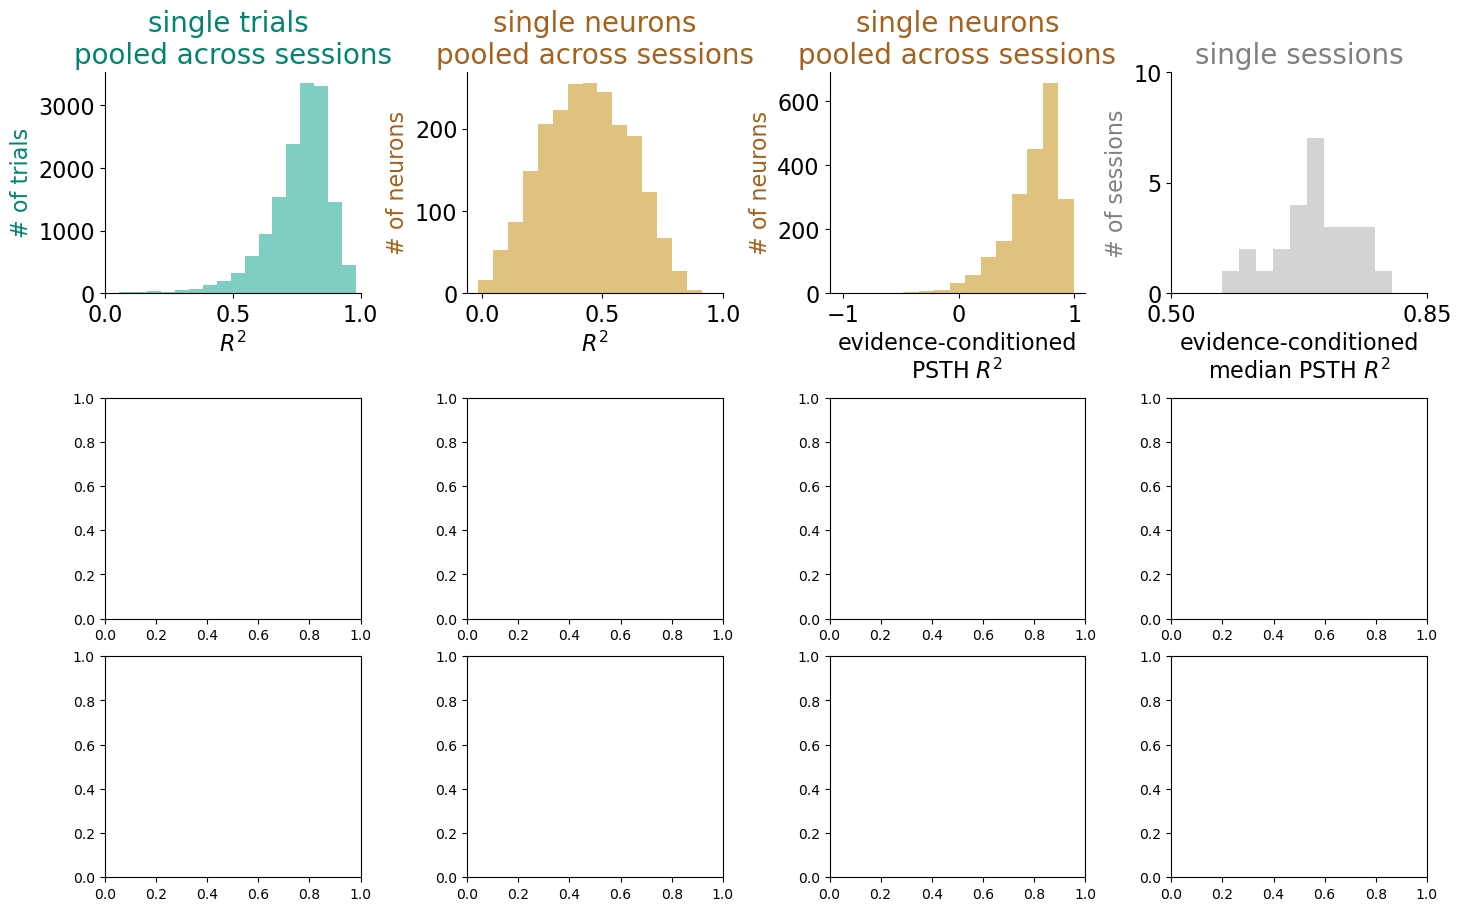

In [8]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
fig, ax = plt.subplots(3, 4, figsize=(14.5, 9), constrained_layout=True)

ax[0, 0].set_title("single trials \npooled across sessions", color='#018571', fontsize=20)
ax[0, 0].hist(r2ss[r2ss >= 0], bins=18, color='#80cdc1', ec="black")

offset = 0.025
ax[0, 0].spines[['right', 'top']].set_visible(False)
ax[0, 0].set_xticks([0, 0.5, 1])
ax[0, 0].set_xlim([0, 1])
ax[0, 0].set_ylabel("# of trials", color='#018571', fontsize=16)
ax[0, 0].set_xlabel("$R^2$", fontsize=16)
ax[0, 0].tick_params(axis='both', which='major', labelsize=16)

ax[0, 1].set_title("single neurons\npooled across sessions", color='#a6611a', fontsize=20)
ax[0, 1].hist(r2s2s, bins=15, color='#dfc27d', ec="black")

offset = 0.02
ax[0, 1].spines[['right', 'top']].set_visible(False)
ax[0, 1].set_xlabel("$R^2$", fontsize=16)
ax[0, 1].set_xticks([0, 0.5, 1])
ax[0, 1].set_ylabel("# of neurons", fontsize=16, color='#a6611a')
ax[0, 1].tick_params(axis='both', which='major', labelsize=16)

ax[0, 2].set_title("single neurons\npooled across sessions", color='#a6611a', fontsize=20)
ax[0, 2].hist(r2_findr_priors_sess, bins=15, color='#dfc27d', ec="black")

offset = 0.02
ax[0, 2].spines[['right', 'top']].set_visible(False)
ax[0, 2].set_xlabel("evidence-conditioned\nPSTH $R^2$", fontsize=16)
ax[0, 2].set_xticks([-1, 0, 1])
ax[0, 2].set_ylabel("# of neurons", fontsize=16, color='#a6611a')
ax[0, 2].tick_params(axis='both', which='major', labelsize=16)

ax[0, 3].set_title("single sessions", color='gray', fontsize=20)
ax[0, 3].hist(second_quartile_r2_findr_priors, bins=10, color='lightgray', ec="black")

offset = 0.02
ax[0, 3].spines[['right', 'top']].set_visible(False)
ax[0, 3].set_xlabel("evidence-conditioned\nmedian PSTH $R^2$", fontsize=16)
ax[0, 3].set_xticks([0.5, 0.85])
ax[0, 3].set_ylabel("# of sessions", fontsize=16, color='gray')
ax[0, 3].tick_params(axis='both', which='major', labelsize=16)
ax[0, 3].set_yticks([0, 5, 10])